#### Import stuff

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Path

In [33]:
path = os.getcwd()
df = pd.read_csv(path + "\clean_data\cleaned_data_global_mental_health.csv")
df

,Unnamed: 0,Country,Region,Importance,Self_experience,Age,Age_range,Gender,Education,Country_wealth
0,0,United States,North America,As important,No,80,50+,F,Secondary,High income
1,1,United States,North America,As important,No,23,15-24,M,Tertiary,High income
2,2,United States,North America,As important,No,29,25-34,M,Tertiary,High income
3,3,United States,North America,As important,No,60,50+,F,Tertiary,High income
4,4,United States,North America,As important,No,41,35-49,M,Secondary,High income
...,...,...,...,...,...,...,...,...,...,...
119083,119083,Kosovo,Eastern Europe,As important,No,27,25-34,F,Tertiary,Upper-middle income
119084,119084,Kosovo,Eastern Europe,As important,Yes,24,15-24,F,Tertiary,Upper-middle income
119085,119085,Kosovo,Eastern Europe,More important,No,24,15-24,M,Tertiary,Upper-middle income
119086,119086,Kosovo,Eastern Europe,More important,No,29,25-34,M,Tertiary,Upper-middle income


### Create a barplot

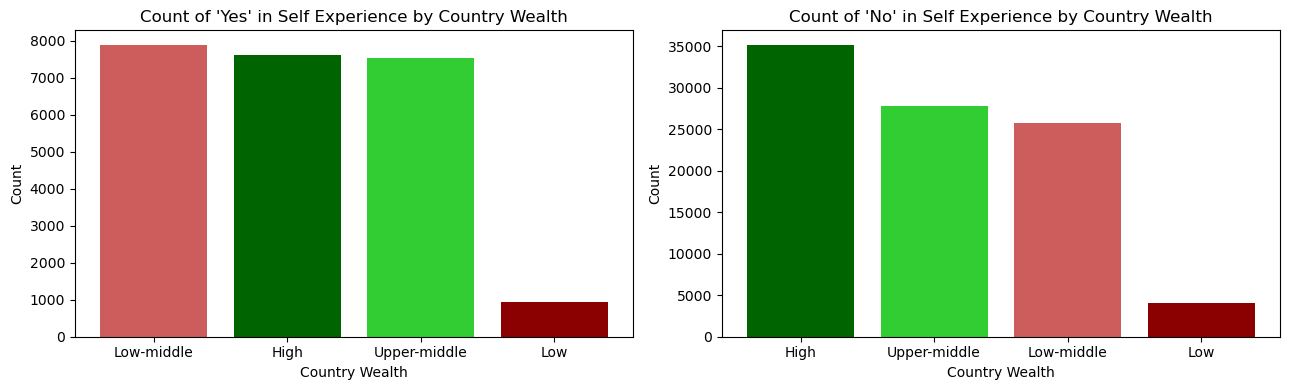

In [34]:
# Filter the DataFrame for "yes" and "no" values in the self_experience column
yes_df = df[df["Self_experience"] == "Yes"]
no_df = df[df["Self_experience"] == "No"]

# Count the occurrences of each country_wealth value in the filtered DataFrames
yes_wealth_counts = yes_df["Country_wealth"].value_counts()
no_wealth_counts = no_df["Country_wealth"].value_counts()

# Rename the bars
yes_wealth_counts = yes_wealth_counts.rename({
    "Lower-middle income": "Low-middle",
    "High income": "High",
    "Low income": "Low",
    "Upper-middle income": "Upper-middle"
})
no_wealth_counts = no_wealth_counts.rename({
    "Lower-middle income": "Low-middle",
    "High income": "High",
    "Low income": "Low",
    "Upper-middle income": "Upper-middle"
})

# Define bar colors
bar_colors = {
    "High": "darkgreen",
    "Upper-middle": "limegreen",
    "Low": "darkred",
    "Low-middle": "indianred"
}

# Plot the bar plots
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
plt.bar(yes_wealth_counts.index, yes_wealth_counts.values, color=[bar_colors.get(x, 'gray') for x in yes_wealth_counts.index])
plt.xlabel("Country Wealth")
plt.ylabel("Count")
plt.title("Count of 'Yes' in Self Experience by Country Wealth")

plt.subplot(1, 2, 2)
plt.bar(no_wealth_counts.index, no_wealth_counts.values, color=[bar_colors.get(x, 'gray') for x in no_wealth_counts.index])
plt.xlabel("Country Wealth")
plt.ylabel("Count")
plt.title("Count of 'No' in Self Experience by Country Wealth")

plt.tight_layout()
plt.show()

### Create a table for the importance

In [46]:
df = pd.read_csv(path + "\clean_data\cleaned_data_global_mental_health.csv")
importance_counts = df["Importance"].value_counts(normalize=True) * 100

# Create a new DataFrame to display the results
importance_table = pd.DataFrame({
    "Importance": importance_counts.index,
    "Percentage": importance_counts.values
})

# Sort the table by the "Importance" column
importance_table = importance_table.sort_values("Percentage")

# Display the table
print(importance_table)

       Importance  Percentage
3      DK/Refused    1.398126
2  Less important    3.560392
1  More important   44.656053
0    As important   50.385429
